In [2]:
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import root_to_df, filter_region, filter_tag, drop_fakes, drop_twodim
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import pandas as pd
from sklearn import preprocessing

In [3]:
data_path = "../processed_data/"
signal = "Xtohh2000_Hw"
region = "SR"
tag=2

In [4]:
root_file_path = data_path + "all_2000_full.root"
df = root_to_df(root_file_path)
df =  filter_region(df,region )
df = filter_tag(df, tag)
df = drop_fakes(df) #CHECK THIS DROPPED FAKES!
df = drop_twodim(df)

In [5]:
df_data = df[df["sample"]=="data"]
df_fakes = df[df["sample"]=="fakes"]

df_signal = df[df["sample"]==signal]

In [6]:
df_csv = pd.read_csv(data_path+"Xtohh2000.csv")
df_csv =  filter_region(df_csv,region )
df_csv = filter_tag(df_csv, tag)
df_csv["m_region"].value_counts()
df_csv
y = df_csv["sample"] == signal
display(df_csv.head())
df_csv.columns

,sample,EventWeightNoXSec,EventWeight,EventNumber,m_region,m_FJNbtagJets,m_AntiBTag,m_AntiTauTag,m_FJpt,m_FJeta,...,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt,m_hhm_Coll,m_hhm_Eff,m_hhm_ConEff,m_hhm_ConVis
0,Xtohh2000_Hw,0.008301,0.001020,46746,SR,2,3,0,885.55927,0.104927,...,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630,-999.0,1896.5974,1193.0669,1973.7532
4,Xtohh2000_Hw,0.009094,0.001117,47033,SR,2,2,0,855.69904,0.313113,...,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360,-999.0,1832.4620,1597.4098,1934.0298
15,Xtohh2000_Hw,0.007525,0.000925,47483,SR,2,3,0,552.47845,-0.702952,...,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150,-999.0,1759.5939,1056.4438,2125.3684
18,Xtohh2000_Hw,0.009422,0.001158,42700,SR,2,2,0,525.10590,-0.941433,...,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925,-999.0,1262.3474,1561.9706,1574.2820
20,Xtohh2000_Hw,0.009115,0.001120,43588,SR,2,3,0,916.44147,-0.683193,...,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460,-999.0,1807.4701,1296.0286,1838.6957


Index(['sample', 'EventWeightNoXSec', 'EventWeight', 'EventNumber', 'm_region',
       'm_FJNbtagJets', 'm_AntiBTag', 'm_AntiTauTag', 'm_FJpt', 'm_FJeta',
       'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm',
       'm_DTpt_Eff', 'm_DTeta_Eff', 'm_DTphi_Eff', 'm_DTm_Eff',
       'm_DTpt_ConEff', 'm_DTeta_ConEff', 'm_DTphi_ConEff', 'm_DTm_ConEff',
       'm_DTpt_ConVis', 'm_DTeta_ConVis', 'm_DTphi_ConVis', 'm_DTm_ConVis',
       'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt', 'm_hhm_Coll', 'm_hhm_Eff', 'm_hhm_ConEff', 'm_hhm_ConVis'],
      dtype='object')

In [7]:
features=['m_FJpt', 
          'm_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm','m_dPhiFTwDT', 
          'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm','m_bbttpt']

In [8]:
df = df_csv[features]



In [9]:
df.head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
4,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
15,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
18,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
20,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


In [10]:
df.columns

Index(['m_FJpt', 'm_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi',
       'm_DTm', 'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt'],
      dtype='object')

In [11]:
df

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,885.55927,0.104927,-2.448576,127604.300,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.887240,1631.6702,263.697630
4,855.69904,0.313113,-1.859287,122862.900,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.033330,1293.4028,463.512360
15,552.47845,-0.702952,-2.549875,109091.670,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.559220,1659.8483,80.008150
18,525.10590,-0.941433,-1.130162,82382.280,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.607220,1075.3092,109.524925
20,916.44147,-0.683193,1.804695,115936.010,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.350300,1595.7611,244.283460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101826,619.94476,-1.530844,2.352461,93778.555,419.90290,1.224686,-0.896622,40863.637,3.034102,4.098625,-0.280388,286.408970,2155.6992,207.416440
102176,611.34870,-0.871494,-0.264761,227763.140,467.55270,0.094108,2.768519,98680.410,3.033280,3.183265,-0.295021,169.082120,1239.1935,155.007490
102488,777.56586,1.187897,-2.571395,48316.727,434.83230,1.713899,-0.107483,67534.984,2.463912,2.519432,0.347042,77.403076,1145.7860,516.615660
103066,353.45984,0.976739,-3.131807,79305.380,442.49554,0.970799,0.020331,56492.152,3.131047,3.131053,0.771418,42.421673,803.4093,89.133310


In [12]:
df.columns

Index(['m_FJpt', 'm_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi',
       'm_DTm', 'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt'],
      dtype='object')

In [13]:
Y = y.to_numpy(dtype=int)

In [14]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [15]:
X = df.values


In [16]:
X

array([[ 8.8555927e+02,  1.0492674e-01, -2.4485755e+00, ...,
         2.3788724e+02,  1.6316702e+03,  2.6369763e+02],
       [ 8.5569904e+02,  3.1311333e-01, -1.8592868e+00, ...,
         4.8503333e+02,  1.2934028e+03,  4.6351236e+02],
       [ 5.5247845e+02, -7.0295170e-01, -2.5498753e+00, ...,
         1.0455922e+02,  1.6598483e+03,  8.0008150e+01],
       ...,
       [ 7.7756586e+02,  1.1878972e+00, -2.5713952e+00, ...,
         7.7403076e+01,  1.1457860e+03,  5.1661566e+02],
       [ 3.5345984e+02,  9.7673905e-01, -3.1318066e+00, ...,
         4.2421673e+01,  8.0340930e+02,  8.9133310e+01],
       [ 6.4546620e+02, -5.6686050e-01,  1.2123379e+00, ...,
         2.1359639e+02,  1.1137911e+03,  3.1636932e+02]])

In [17]:
mm_scaler = preprocessing.MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X)



In [18]:
X_scaled[:,0]

array([0.44491035, 0.42209011, 0.19035826, ..., 0.36237799, 0.03826124,
       0.26142278])

## $\chi^2$ test for feature selection

In [31]:
#https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
stats, pvals = chi2(X_scaled,Y)

In [20]:
stats

array([1.07262981e+01, 6.13942870e-03, 5.16073799e-02, 8.42759058e-03,
       6.99551374e+00, 5.10781496e-01, 1.06685077e-01, 5.85135795e-03,
       4.05183002e-02, 6.11963994e-02, 2.22775227e-03, 6.83438244e+00,
       9.91407872e+00, 4.30525661e+00])

In [21]:
pvals

array([0.00105624, 0.93754606, 0.82028955, 0.92685543, 0.00817143,
       0.47480075, 0.74395016, 0.93902595, 0.84047059, 0.80461488,
       0.96235457, 0.00894196, 0.00164019, 0.03799476])

In [27]:
p_values = pd.Series(pvals,index = df.columns)
p_values.sort_values(ascending = False , inplace = True)

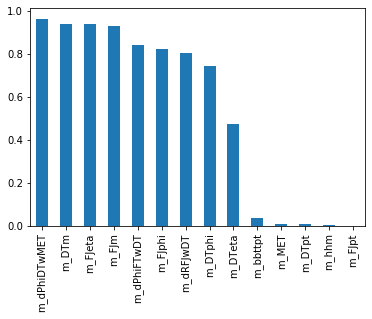

In [28]:
p_values.plot.bar()

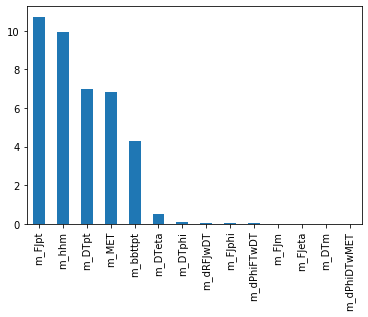

In [29]:
s_vals = pd.Series(stats, index=df.columns)
s_vals.sort_values(ascending = False , inplace = True)
s_vals.plot.bar()

[0.08588025 0.04875413 0.03995514 0.11977058 0.05318857 0.04989595
 0.03678708 0.09427755 0.0449037  0.06595248 0.05229242 0.07149175
 0.18518318 0.05166722]


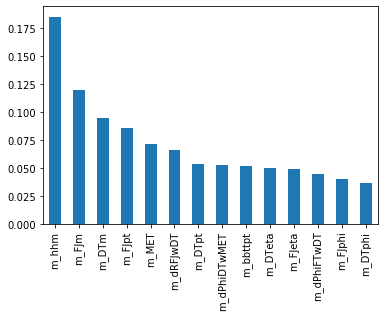

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)

print(clf.feature_importances_)

xTree_vals = pd.Series(clf.feature_importances_, index=df.columns)
xTree_vals.sort_values(ascending = False , inplace = True)
xTree_vals.plot.bar()


In [36]:
df.columns

Index(['m_FJpt', 'm_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi',
       'm_DTm', 'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt'],
      dtype='object')

In [33]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)



In [34]:
X_new.shape               



(8737, 5)

In [37]:
#https://blog.datadive.net/selecting-good-features-part-iii-random-forests/